In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, norm, probplot

In [2]:
# dataset path 
df = pd.read_csv("dataset.csv")
pd.set_option('display.max_columns', None)
print(len(df))
print(len(df.columns))
df.head()

8845
149


,gameId,plateformId,gameDuration,seasonId,gameMode,participantId_x1,matchHistoryUri_x1,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,participantId_x2,matchHistoryUri_x2,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,participantId_x3,matchHistoryUri_x3,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,participantId_x4,matchHistoryUri_x4,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,participantId_x5,matchHistoryUri_x5,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,is_winner_x,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,participantId_y1,matchHistoryUri_y1,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,participantId_y2,matchHistoryUri_y2,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,participantId_y3,matchHistoryUri_y3,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,participantId_y4,matchHistoryUri_y4,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,participantId_y5,matchHistoryUri_y5,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,is_winner_y,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,5205972431,EUW1,2008,13,CLASSIC,1,/v1/stats/player_history/EUW1/2089893920870752,11,Master Yi,5,10,1,183362,18,36863,2,29,14,2,/v1/stats/player_history/EUW1/237332891,122,Darius,12,12,3,120885,14,49607,1,150,16,3,/v1/stats/player_history/EUW1/233138516,238,Zed,9,8,2,122282,16,22046,2,151,16,4,/v1/stats/player_history/EUW1/209550772,117,Lulu,0,9,8,16743,54,20651,1,18,13,5,/v1/stats/player_history/EUW1/2573983317452064,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,Fail,100,True,True,False,True,6,6,/v1/stats/player_history/EUW1/2089893920870752,56,Nocturne,7,3,16,197003,26,35310,1,30,18,7,/v1/stats/player_history/EUW1/237332891,523,Aphelios,23,7,11,217791,27,26187,2,209,17,8,/v1/stats/player_history/EUW1/233138516,350,Yuumi,1,5,29,20352,53,10917,1,4,16,9,/v1/stats/player_history/EUW1/209550772,58,Renekton,5,9,9,107494,22,40800,1,122,16,10,/v1/stats/player_history/EUW1/2573983317452064,99,Lux,10,8,6,170953,16,16507,3,169,17,Win,200,False,False,True,False,8
1,5205876463,EUW1,1618,13,CLASSIC,1,/v1/stats/player_history/EUW1/212111580,147,Seraphine,3,11,13,45389,49,15541,1,40,12,2,/v1/stats/player_history/EUW1/239370063,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,3,/v1/stats/player_history/EUW1/2089893920870752,11,Master Yi,22,8,3,183412,18,29513,1,50,16,4,/v1/stats/player_history/EUW1/237332891,27,Singed,2,9,7,74770,6,18434,1,111,14,5,/v1/stats/player_history/EUW1/233138516,101,Xerath,4,5,15,64417,12,10832,1,83,14,Win,100,True,False,False,True,5,6,/v1/stats/player_history/EUW1/212111580,104,Graves,8,10,6,125942,12,24965,0,26,13,7,/v1/stats/player_history/EUW1/239370063,222,Jinx,7,8,14,93279,15,20544,2,137,14,8,/v1/stats/player_history/EUW1/2089893920870752,25,Morgana,11,8,19,36076,56,21017,0,33,13,9,/v1/stats/player_

## Data exploration

In [3]:
# removing useless columns 

cols = [col for col in df.columns if "uri" in col.lower() or "participant" in col.lower()]
df = df.drop([*cols, "gameId"], axis=1)
df.head()

,plateformId,gameDuration,seasonId,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,is_winner_x,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,is_winner_y,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,EUW1,2008,13,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,Fail,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,Win,200,False,False,True,False,8
1,EUW1,1618,13,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,Win,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,Fail,200,False,True,False,False,2
2,EUW1,1588,13,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,Win,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,Fail,200,False,False,False,False,2
3,EUW1,1605,13,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,Win,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,25,13,Fail,200,True,False,False,True,2
4,EUW1,1353,13,CLASSIC,57,Maokai,3,2,11,42097,18,13299,0,17,11,18,Tristana,4,3,7,55948,10,9875,1,8

In [4]:
print(f"{len(df.columns)} columns left")

128 columns left


# Goal : predicting which team is going to win

<h2> We need to declare clearly who is the winner</h2>
<ul>
    <li> Let's create a 'winner' column by combining 'is_winner_x' and 'is_winner_y</li>
    <li> Winner will take the value 0 or 1 : 0 means that the x team won, 1 means that the y team won</li>
    <li> important : we are not interested in recreative game modes</li>
</ul>

In [5]:
print(df["gameMode"].unique())
df = df[df["gameMode"] == "CLASSIC"]
print(f"New df size : {len(df)}")
df

['CLASSIC' 'ONEFORALL' 'ARAM' 'URF' 'NEXUSBLITZ' 'TUTORIAL_MODULE_2']
New df size : 6950


,plateformId,gameDuration,seasonId,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,is_winner_x,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,is_winner_y,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,EUW1,2008,13,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,Fail,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,Win,200,False,False,True,False,8
1,EUW1,1618,13,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,Win,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,Fail,200,False,True,False,False,2
2,EUW1,1588,13,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,Win,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,Fail,200,False,False,False,False,2
3,EUW1,1605,13,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,Win,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,25,13,Fail,200,True,False,False,True,2
4,EUW1,1353,13,CLASSIC,57,Maokai,3,2,11,42097,18,13299,0,17,11,18,Tristana,4,3,7,55948,10,9875,1,8

In [6]:
df["is_winner_x"].replace({"Win" : 1, "Fail" : 0}, inplace=True)
# renaming the a more understandable target feature's name
df = df.rename(columns={"is_winner_x" : "outcome"})
# removing the unnecessary feature 'is_winner_y'
df = df.drop(["is_winner_y", "seasonId"], axis=1)
df.head()


,plateformId,gameDuration,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,outcome,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills
0,EUW1,2008,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,0,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,200,False,False,True,False,8
1,EUW1,1618,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,1,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,200,False,True,False,False,2
2,EUW1,1588,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,1,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,200,False,False,False,False,2
3,EUW1,1605,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,1,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,25,13,200,True,False,False,True,2
4,EUW1,1353,CLASSIC,57,Maokai,3,2,11,42097,18,13299,0,17,11,18,Tristana,4,3,7,55948,10,9875,1,87,10,98,Shen,3,4,8,52504,10,15579,0,85,12,11,Master Yi,12,1,5,136387

### At this point, I'm satisfied with the columns. 

## Let's do a simple data exploration 

<p> We have an almost perfectly balanced dataset ! </p>

In [7]:
# is our dataset imbalanced ? 
outcome_ratio = df["outcome"].value_counts(normalize=True)
print(f"{round(outcome_ratio[0] * 100,2)} % of win | {round(outcome_ratio[1] * 100,2)} % of looses")

49.48 % of win | 50.52 % of looses


<p>Identifying the different data types</p> 
<p>How many rows contains None value ? </p>

In [8]:
# data type
print(f"Data type \n")
print(df.dtypes)
print("Data type == object \n")
# For strings, the column type will always be 'object.' 
# There is no need for you convert anything; 
# it is already doing what you require.

# no missing valeus apparently
for col in df.columns: 
    print(f"{col} contains : {df[col].isna().sum()} null values")
print(df.isna().sum())

Data type 

plateformId        object
gameDuration        int64
gameMode           object
championId_x1       int64
championName_x1    object
                    ...  
firstBlood_y         bool
firstTower_y         bool
firstBaron_y         bool
firstDragon_y        bool
 towerKills         int64
Length: 126, dtype: object
Data type == object 

plateformId contains : 0 null values
gameDuration contains : 0 null values
gameMode contains : 0 null values
championId_x1 contains : 0 null values
championName_x1 contains : 0 null values
kills_x1 contains : 0 null values
deaths_x1 contains : 0 null values
assists_x1 contains : 0 null values
totalDammageDealt_x1 contains : 0 null values
visionScore_x1 contains : 0 null values
totalDamageTaken_x1 contains : 0 null values
turretKills_x1 contains : 0 null values
totalMinionsKilled_x1 contains : 0 null values
champLevel_x1 contains : 0 null values
championId_x2 contains : 0 null values
championName_x2 contains : 0 null values
kills_x2 contains : 0 

## What are the most played champions

In [9]:
all_champs = df[[col for col in df.columns if "championName" in col]]
pick_rate = pd.Series(0,index=all_champs["championName_x1"].unique())
for col in all_champs.columns: 
    pick_rate += all_champs[col].value_counts() / len(df)
pick_rate = pick_rate.sort_values(ascending=True) / 10 
assert pick_rate.sum() == 1
pick_rate = pick_rate.sort_values(ascending=False)
print(pick_rate)

Lux             0.031597
Miss Fortune    0.022345
Yasuo           0.020806
Morgana         0.018417
Master Yi       0.017914
                  ...   
Ivern           0.001108
Rumble          0.001065
Corki           0.001022
Skarner         0.000993
Lissandra       0.000921
Length: 154, dtype: float64


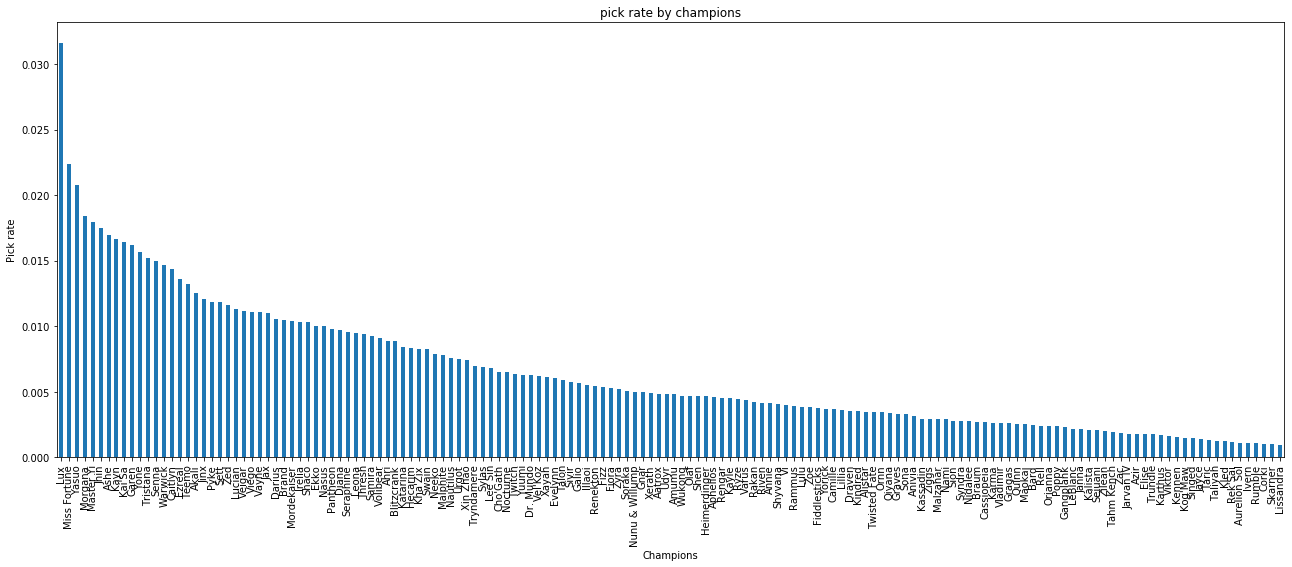

In [10]:
# count plot 
plt.figure(figsize=(22,8))
plt.xticks(rotation=90)
plt.ylabel("Pick rate")
plt.xlabel("Champions")
plt.title("pick rate by champions")
pick_rate.plot(kind="bar") 

## Plotting win rate by champions

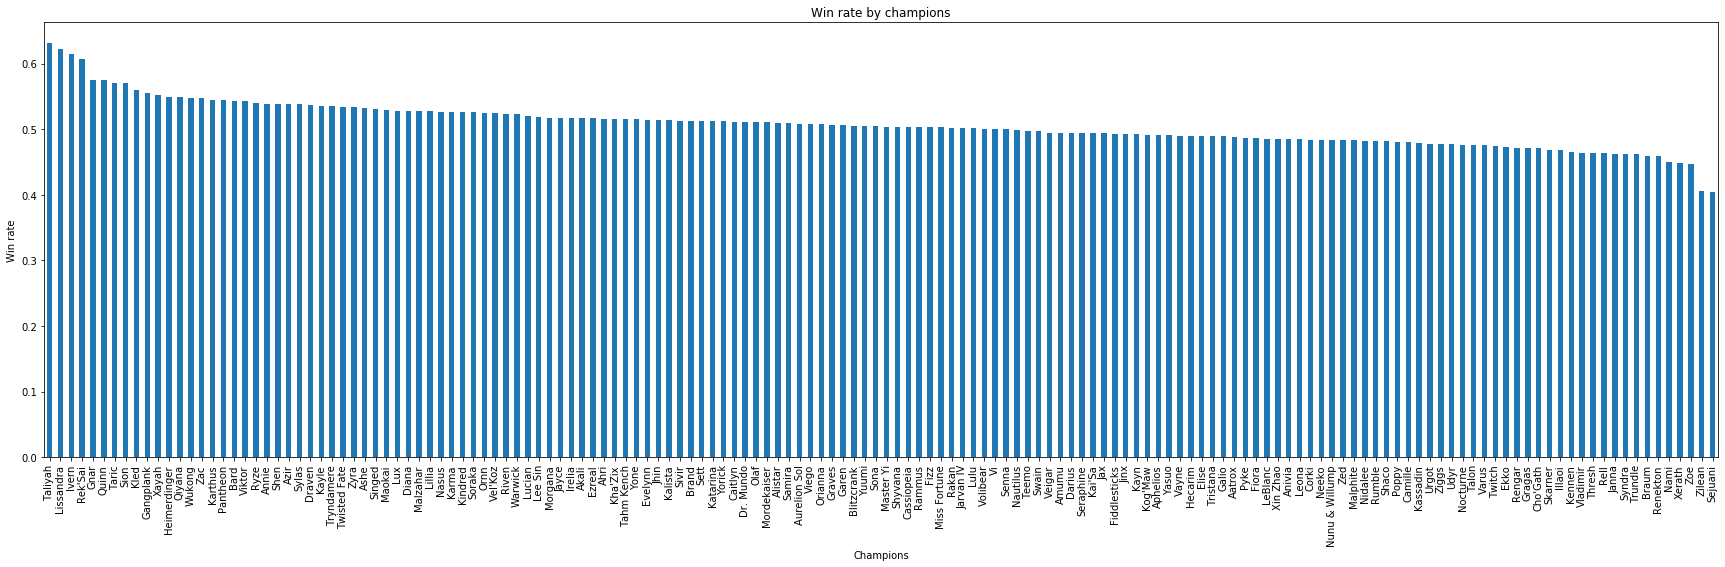

In [11]:
winrate_by_champ = pd.Series(0,index=all_champs["championName_x1"].unique())
for col in all_champs.columns: 
    winrate_by_champ += df.groupby([col])["outcome"].mean()
    
# empirical mean
winrate_by_champ = winrate_by_champ.sort_values(ascending=False) / len(all_champs.columns)
# count plot 
plt.figure(figsize=(30,8))
plt.xticks(rotation=90)
plt.xlabel("Champions")
plt.title("Win rate by champions")
plt.ylabel("Win rate")
winrate_by_champ.plot(kind="bar") 

### Do we have any correlation between the win rate and the pick rate ? 

Pearson coefficient : -0.06276804194507071
 Spearman’s Correlation : -0.057650793025629504


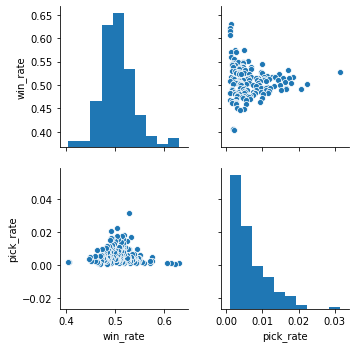

In [12]:
# intermediate dataframe
rate_df = pd.DataFrame(index=winrate_by_champ.index)
rate_df["win_rate"] = winrate_by_champ 
rate_df["pick_rate"] = pick_rate 
rate_df["champion_name"] = rate_df.index
rate_df = rate_df.reindex(["champion_name", "win_rate", "pick_rate"], axis=1)

# The linear relationship is non existing here
print(f"Pearson coefficient : {pearsonr(rate_df['pick_rate'], rate_df['win_rate'])[0]}")
# Non linear 
print(f" Spearman’s Correlation : {spearmanr(rate_df['pick_rate'], rate_df['win_rate'])[0]}")
sns.pairplot(rate_df)

### It seems like the win rate and the pick rate aren't correlated
<p> This can be explained by : </p> 
<ol>
    <li> Champions that arent't played the most might be difficult to beat because of their 'unkown' abilities</li> 
    <li> The dataset is biaised by the lack of data </li>
</ol> 

#### option 2 makes sense for me, we will keep investigating later 
    

## Let's create some features based on each team's feature ! 

In [13]:
# I want to create a total_kill, total_assist, total_death feature for each team

columns = ["kills", "assists", "deaths", "vision"]
for team in ["x", "y"]: 
    for column in columns: 
        df[f"total_{column}_{team}"] = 0
        cols = [col for col in df.columns if (column in col) and ("total" not in col) and team in col] 
        print(cols)
        for col in cols: 
            df[f"total_{column}_{team}"] += df[col]

total_df = df[[col for col in df.columns if "total" in col or col == "outcome"]]
total_df

['kills_x1', 'kills_x2', 'kills_x3', 'kills_x4', 'kills_x5']
['assists_x1', 'assists_x2', 'assists_x3', 'assists_x4', 'assists_x5']
['deaths_x1', 'deaths_x2', 'deaths_x3', 'deaths_x4', 'deaths_x5']
['visionScore_x1', 'visionScore_x2', 'visionScore_x3', 'visionScore_x4', 'visionScore_x5']
['kills_y1', 'kills_y2', 'kills_y3', 'kills_y4', 'kills_y5']
['assists_y1', 'assists_y2', 'assists_y3', 'assists_y4', 'assists_y5']
['deaths_y1', 'deaths_y2', 'deaths_y3', 'deaths_y4', 'deaths_y5']
['visionScore_y1', 'visionScore_y2', 'visionScore_y3', 'visionScore_y4', 'visionScore_y5']


,totalDammageDealt_x1,totalDamageTaken_x1,totalMinionsKilled_x1,totalDammageDealt_x2,totalDamageTaken_x2,totalMinionsKilled_x2,totalDammageDealt_x3,totalDamageTaken_x3,totalMinionsKilled_x3,totalDammageDealt_x4,totalDamageTaken_x4,totalMinionsKilled_x4,totalDammageDealt_x5,totalDamageTaken_x5,totalMinionsKilled_x5,outcome,totalDammageDealt_y1,totalDamageTaken_y1,totalMinionsKilled_y1,totalDammageDealt_y2,totalDamageTaken_y2,totalMinionsKilled_y2,totalDammageDealt_y3,totalDamageTaken_y3,totalMinionsKilled_y3,totalDammageDealt_y4,totalDamageTaken_y4,totalMinionsKilled_y4,totalDammageDealt_y5,totalDamageTaken_y5,totalMinionsKilled_y5,total_kills_x,total_assists_x,total_deaths_x,total_vision_x,total_kills_y,total_assists_y,total_deaths_y,total_vision_y
0,183362,36863,29,120885,49607,150,122282,22046,151,16743,20651,18,133173,27644,176,0,197003,35310,30,217791,26187,209,20352,10917,4,107494,40800,122,170953,16507,169,31,17,46,124,46,71,32,144
1,45389,15541,40,101020,19627,104,183412,29513,50,74770,18434,111,64417,10832,83,1,125942,24965,26,93279,20544,137,36076,21017,33,80259,19272,116,62490,25355,96,43,47,43,96,42,52,43,111
2,109346,11696,136,60388,11926,32,118817,15843,157,88632,31053,132,106733,22520,18,1,112701,24866,148,86090,24516,20,58797,21989,106,37216,21576,53,73078,17593,82,46,33,27,102,27,29,47,61
3,20017,15957,19,83824,10644,123,54537,19135,68,110077,18072,27,149744,18810,152,1,109149,17655,126,27418,19389,33,74772,11150,132,27663,11276,58,129453,25142,25,32,39,32,94,32,31,32,60
4,42097,13299,17,55948,9875,87,52504,15579,85,136387,17620,33,71103,12017,141,1,82716,16538,148,54930,17345,85,71675,19107,15,62717,13467,99,19281,15529,18,31,35,12,63,12,15,31,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8839,25309,17075,24,136640,15113,219,166515,26806,29,145169,22034,184,185430,20257,218,1,134449,21387,146,140747,37893,29,30545,13117,36,128458,11621,176,154187,27197,208,30,43,20,138,20,20,30,127
8841,68502,19364,101,71307,13209,128,70331,18231,95,100938,25699,2,15546,14147,25,0,30073,9436,15,86163,6793,138,110732,20679,31,83526,14733,124,53165,11330,72,23,24,31,55,31,51,23,74
8842,42864,23227,80,11433,12656,10,53084,11582,54,48350,13941,10,68546,9952,99,0,84123,14556,131,7460,5331,2,105008,17289,150,58924,16516,111,80266,19590,6,19,21,31,45,31,26,19,50
8843,30832,10375,47,47225,7927,83,111785,18468,8,64508,12603,98,35970,14047,69,1,15766,10603,26,92350,15785,152,56452,20432,2,79629,10161,122,73997,13726,110,26,33,25,66,25,23,27,85


In [14]:
total_df.describe()

,totalDammageDealt_x1,totalDamageTaken_x1,totalMinionsKilled_x1,totalDammageDealt_x2,totalDamageTaken_x2,totalMinionsKilled_x2,totalDammageDealt_x3,totalDamageTaken_x3,totalMinionsKilled_x3,totalDammageDealt_x4,totalDamageTaken_x4,totalMinionsKilled_x4,totalDammageDealt_x5,totalDamageTaken_x5,totalMinionsKilled_x5,outcome,totalDammageDealt_y1,totalDamageTaken_y1,totalMinionsKilled_y1,totalDammageDealt_y2,totalDamageTaken_y2,totalMinionsKilled_y2,totalDammageDealt_y3,totalDamageTaken_y3,totalMinionsKilled_y3,totalDammageDealt_y4,totalDamageTaken_y4,totalMinionsKilled_y4,totalDammageDealt_y5,totalDamageTaken_y5,totalMinionsKilled_y5,total_kills_x,total_assists_x,total_deaths_x,total_vision_x,total_kills_y,total_assists_y,total_deaths_y,total_vision_y
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,102163.353525,22222.032806,90.733237,101316.776547,22061.968921,90.171942,101201.799281,22098.042446,90.948777,101280.818273,22122.583885,89.803597,102596.271799,22307.317842,89.820288,0.505180,102849.817986,22262.127338,91.952518,100444.700288,22334.432662,88.691655,102222.007482,22280.574820,91.535540,101818.779137,22288.286331,90.663597,102324.815971,22360.211655,91.174245,30.911942,36.499424,30.785324,88.591942,30.609496,36.706187,31.088777,88.101151
std,68911.812149,13150.692932,65.029691,71238.179427,13075.533253,64.731827,69554.618039,13150.154714,64.812680,70266.750120,13292.377899,64.731277,69076.260046,13158.048078,64.558974,0.500009,69780.432969,12916.270420,64.755120,70650.232392,13038.453500,64.664582,71335.066167,13252.077978,65.285973,71595.859447,12988.296928,65.185798,70076.513737,13069.724203,64.842291,15.550234,22.356437,15.677264,44.568042,15.664658,23.117431,15.571893,45.547512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52691.250000,12988.000000,31.000000,50382.750000,12889.750000,31.000000,50771.750000,12874.250000,31.000000,50515.000000,12992.000000,31.000000,52834.000000,13030.250000,31.000000,0.000000,51981.250000,13277.750000,33.000000,49133.500000,13205.750000,30.000000,50477.500000,13190.250000,32.000000,49721.500000,13172.500000,31.000000,52949.500000,13342.250000,31.000000,20.000000,19.000000,19.000000,57.000000,19.000000,19.000000,20.000000,56.000000
50%,91278.000000,20284.000000,87.000000,88161.500000,19952.000000,86.000000,88786.500000,19957.500000,87.000000,89054.500000,19916.000000,85.000000,91296.500000,20156.000000,86.000000,1.000000,91030.500000,20215.000000,89.000000,87304.000000,20316.500000,82.000000,90575.500000,20252.000000,88.000000,89187.500000,20386.500000,86.000000,89689.500000,20435.500000,89.000000,31.000000,35.000000,31.000000,84.000000,31.000000,35.000000,31.000000,84.000000
75%,137672.750000,29269.000000,138.000000,136885.500000,28780.750000,136.000000,136859.750000,28885.250000,138.000000,136695.750000,28914.500000,135.000000,137858.750000,29113.250000,137.000000,1.000000,138064.750000,28986.250000,139.000000,136947.500000,29050.750000,136.000000,138310.250000,28935.500000,139.000000,139654.250000,29103.750000,137.000000,137679.250000,29095.500000,138.750000,42.000000,51.000000,42.000000,116.000000,42.000000,51.000000,42.000000,116.000000
max,930871.000000,119487.000000,444.000000,981963.000000,104253.000000,435.000000,563969.000000,136499.000000,351.

C:\Users\Programming\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Programming\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


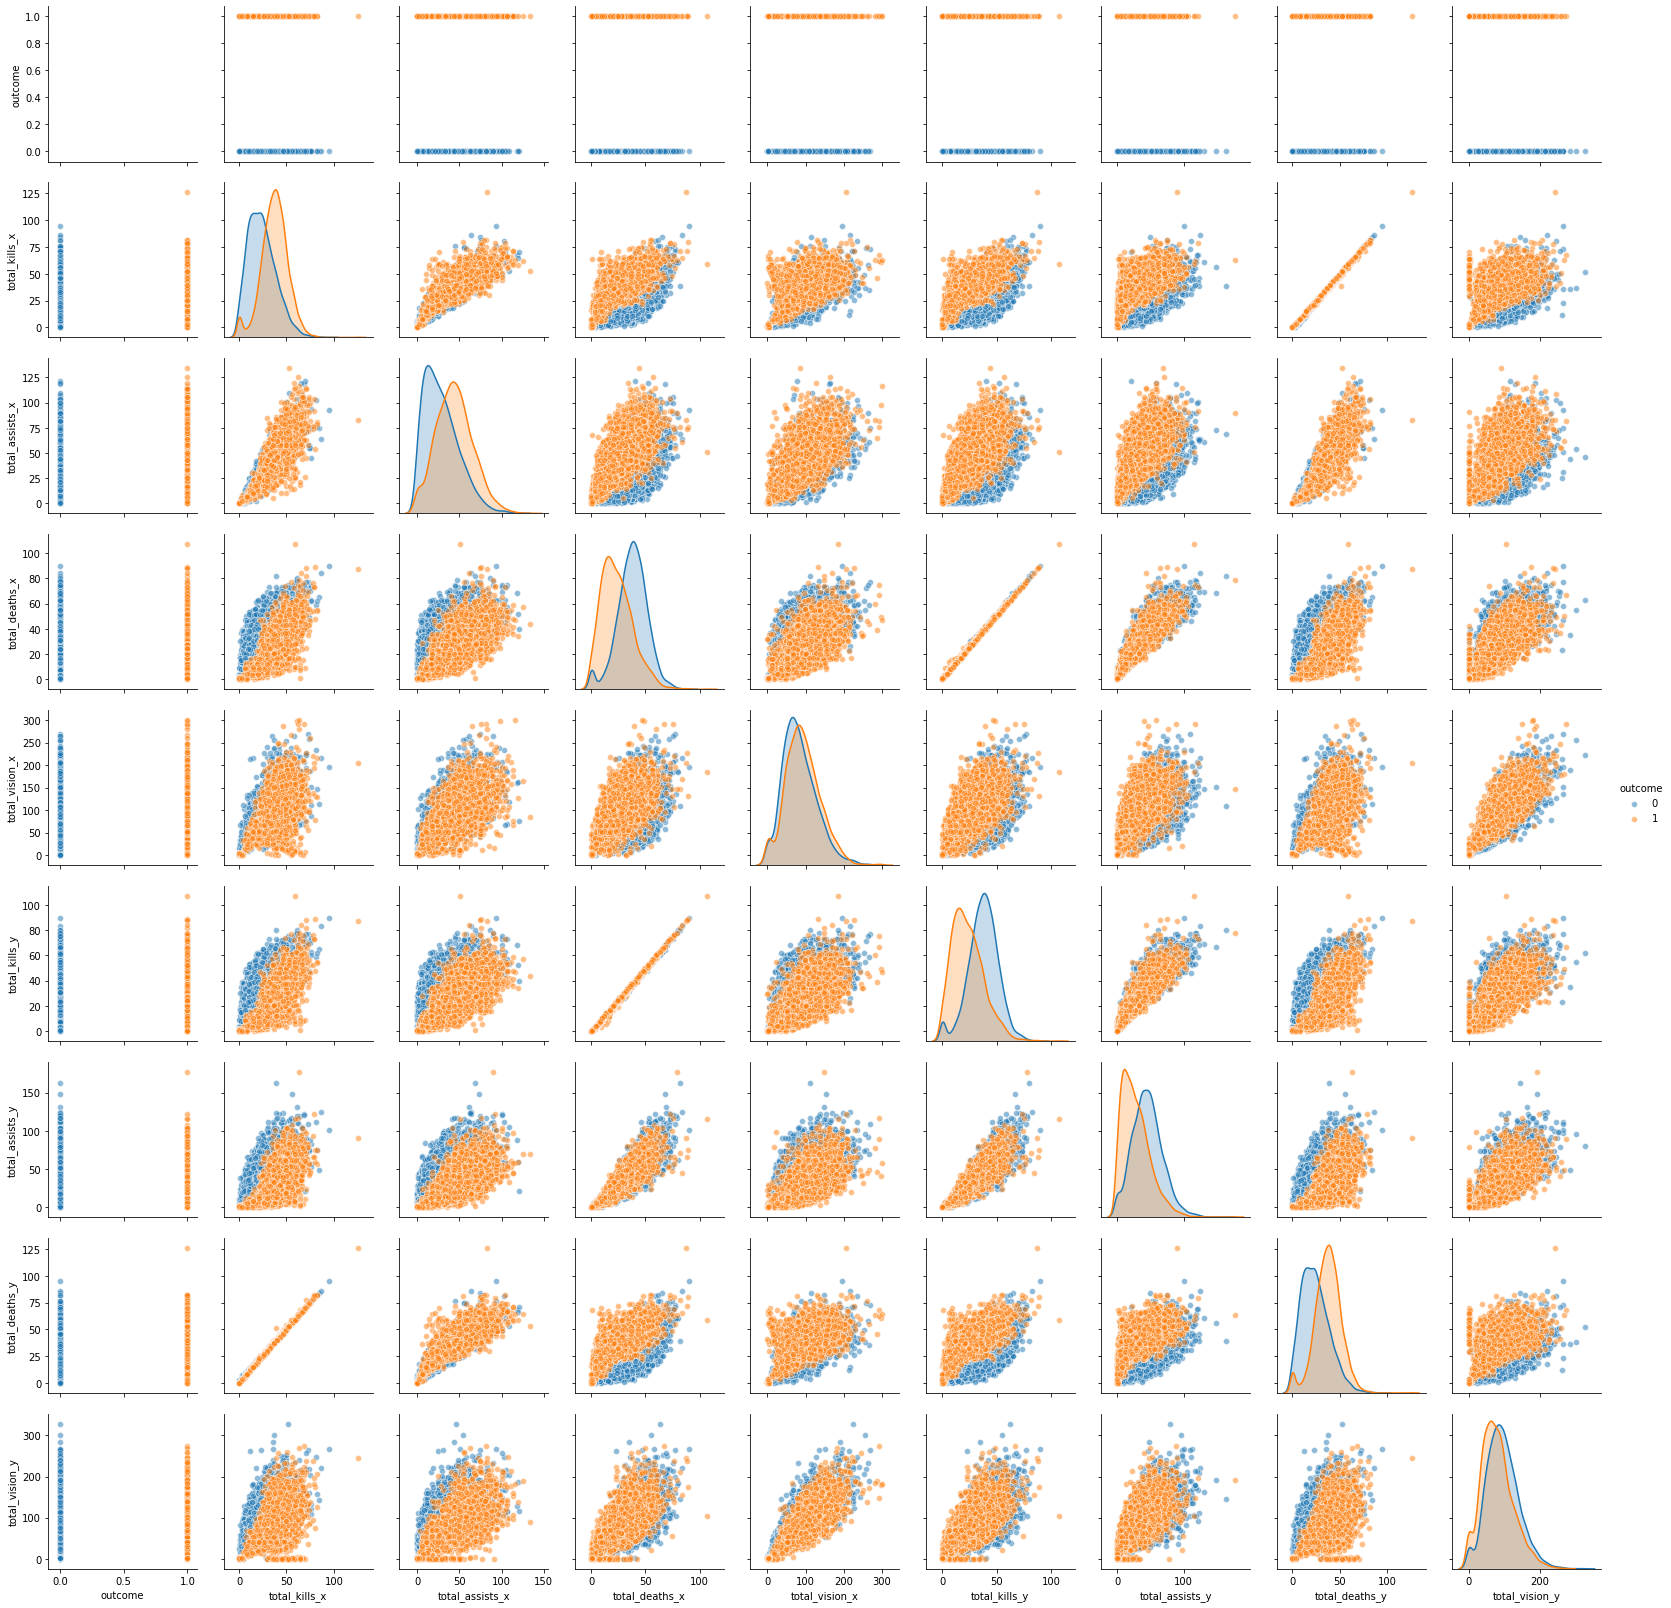

In [15]:
kda_df = df[[col for col in df.columns if "total_kills" in col or "total_assists" in col or "total_deaths" in col or col == "outcome" or "total_vision" in col]]
sns.pairplot(kda_df, hue="outcome", plot_kws={'alpha':0.5})

### Let's get a general idea with the correlation heatmap on the kda df

<ul>
    <li> kills_x is highly correlated to kills_y, everything seem find ! </li>
    <li> total_kills_x and total_deaths_y are the highest correlated varaibles with the game's outcome, which is a good news ! </li>
</ul>

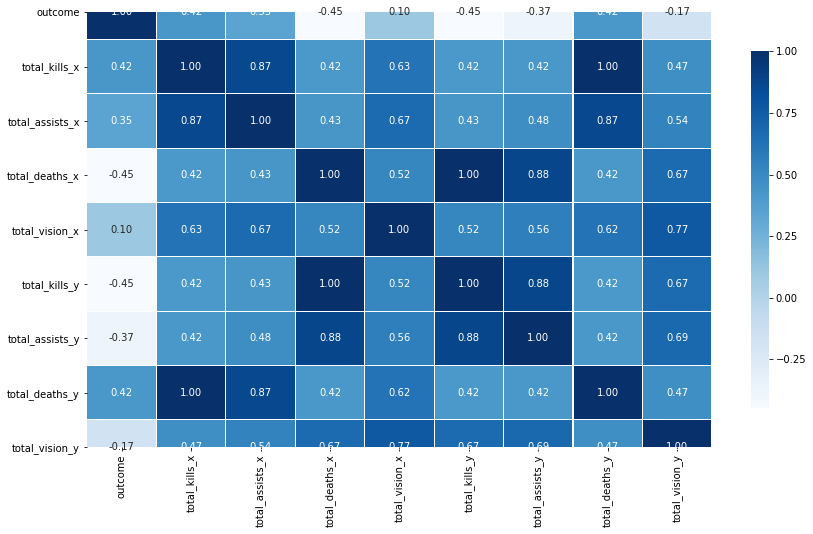

In [16]:
plt.figure(figsize=(14, 8))
sns.heatmap(kda_df.corr(), annot=True, fmt='.2f', cbar_kws={"shrink": .82}, linewidths=0.1, cmap="Blues")
plt.show()

In [17]:
df

,plateformId,gameDuration,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,outcome,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills,total_kills_x,total_assists_x,total_deaths_x,total_vision_x,total_kills_y,total_assists_y,total_deaths_y,total_vision_y
0,EUW1,2008,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,0,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,200,False,False,True,False,8,31,17,46,124,46,71,32,144
1,EUW1,1618,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,1,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,200,False,True,False,False,2,43,47,43,96,42,52,43,111
2,EUW1,1588,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,1,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,200,False,False,False,False,2,46,33,27,102,27,29,47,61
3,EUW1,1605,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,19135,0,68,12,56,Nocturne,8,5,8,110077,15,18072,3,27,14,6,Urgot,11,3,5,149744,17,18810,2,152,15,1,100,False,True,False,False,7,55,Katarina,17,5,2,109149,14,17655,0,126,14,526,Rell,2,9,13,27418,17,19389,0,33,13,81,Ezreal,3,6,8,74772,12,11150,2,132,13,75,Nasus,1,4,0,27663,3,11276,0,58,9,11,Master Yi,9,8,8,129453,14,25142,0,2

### Let's dive into some univariates analysis

<ul>
    <li>These variables are almost following a normal distribution</li>
    <li>Log transiformation might be helpful here</li>
</ul>

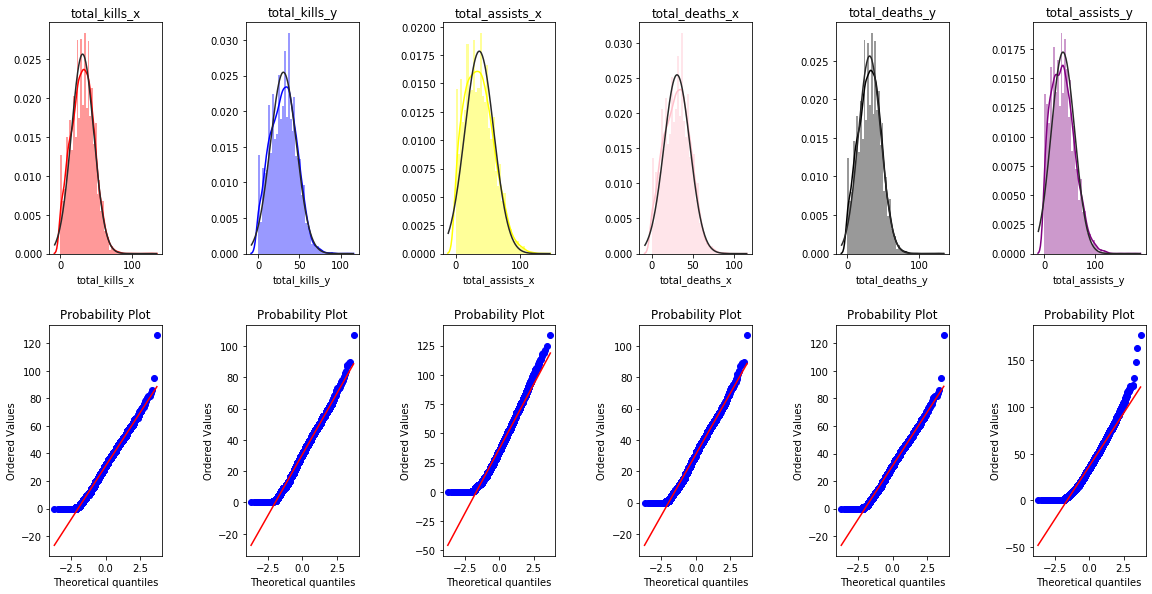

In [18]:
columns = ["total_kills_x", "total_kills_y", "total_assists_x", "total_deaths_x", "total_deaths_y", "total_assists_y"]
colors = ["red", "blue", "yellow", "pink", "black", "purple", "brown"]
fig, ax = plt.subplots(2, len(columns), figsize=(16,8))
fig.tight_layout(h_pad=5, w_pad=5)
for idx, col in enumerate(columns): 
    ax[0][idx].title.set_text(col)
    sns.distplot(df[col], ax=ax[0][idx], fit=norm, color=colors[idx])
    ax[1][idx].title.set_text(col + " prob plot")
    probplot(df[col], plot=ax[1][idx])
plt.show()

### Let's plot some simple scatter plots

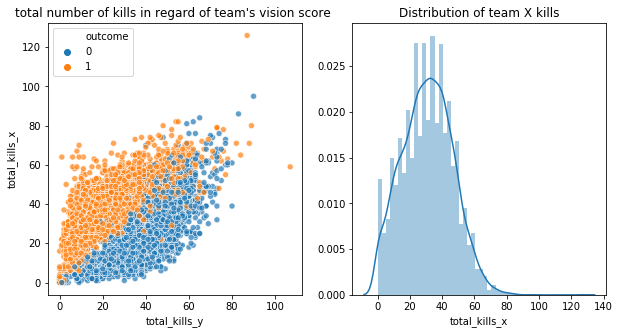

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(data=kda_df, x="total_kills_y", y="total_kills_x", hue="outcome", ax=ax[0], alpha=0.7)
sns.distplot(kda_df["total_kills_x"], ax=ax[1])
ax[0].set_title("total number of kills in regard of team's vision score ")
ax[1].set_title("Distribution of team X kills")
plt.show()

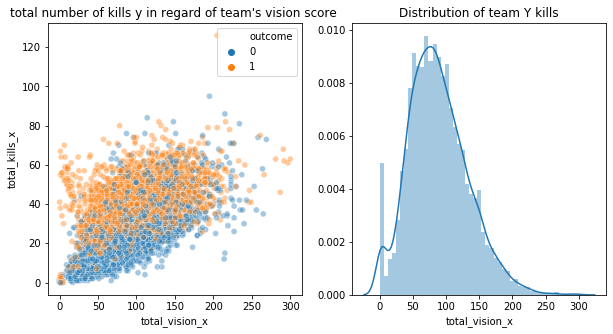

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(data=kda_df, x="total_vision_x", y="total_kills_x", hue="outcome", ax=ax[0], alpha=0.4)
sns.distplot(kda_df["total_vision_x"], ax=ax[1])
ax[0].set_title("total number of kills y in regard of team's vision score ")
ax[1].set_title("Distribution of team Y kills")
plt.show()

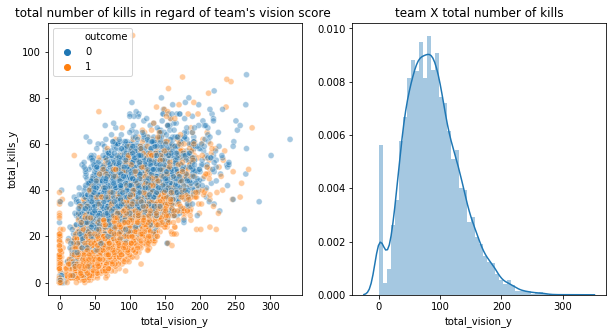

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(data=kda_df, x="total_vision_y", y="total_kills_y", hue="outcome", ax=ax[0], alpha=0.4)
sns.distplot(kda_df["total_vision_y"], ax=ax[1])
ax[0].set_title("total number of kills in regard of team's vision score ")
ax[1].set_title("team X total number of kills")
plt.show()

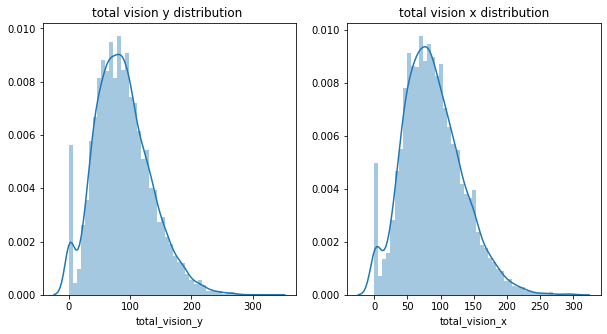

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.distplot(kda_df["total_vision_y"], ax=ax[0])
sns.distplot(kda_df["total_vision_x"], ax=ax[1])
ax[0].set_title("total vision y distribution ")
ax[1].set_title("total vision x distribution")
plt.show()

### Let's look at outliers ! 

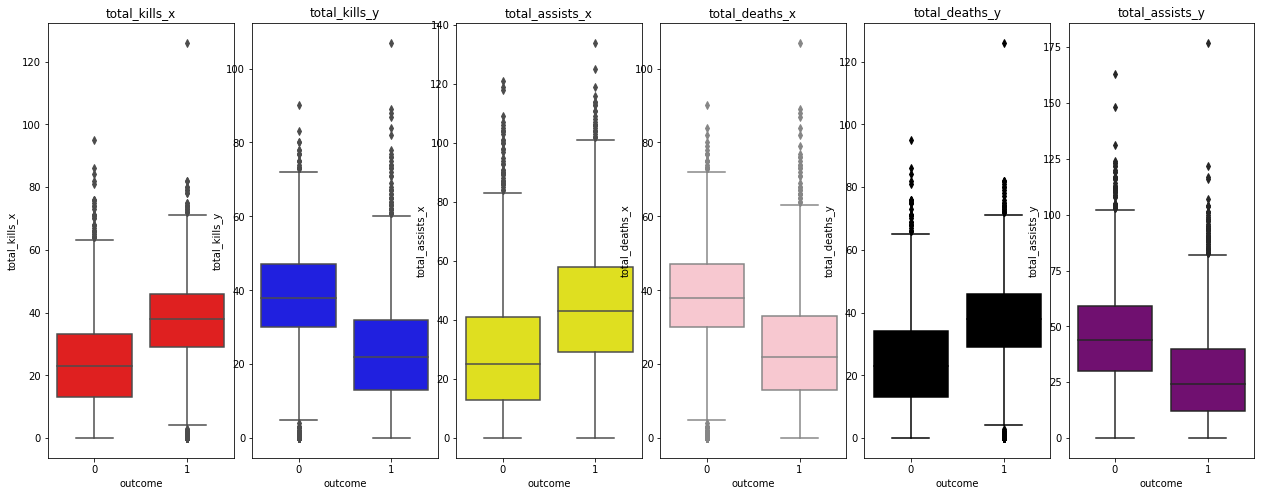

In [23]:
columns = ["total_kills_x", "total_kills_y", "total_assists_x", "total_deaths_x", "total_deaths_y", "total_assists_y"]
colors = ["red", "blue", "yellow", "pink", "black", "purple", "brown"]

fig, ax = plt.subplots(1, len(columns), figsize=(10,8))
plt.subplots_adjust(wspace=0.1,right=1.8)
for idx, col in enumerate(columns): 
    ax[idx].set_title(col)
    sns.boxplot(data=kda_df, x="outcome", y=col, ax=ax[idx], color=colors[idx], orient="v")
plt.show()

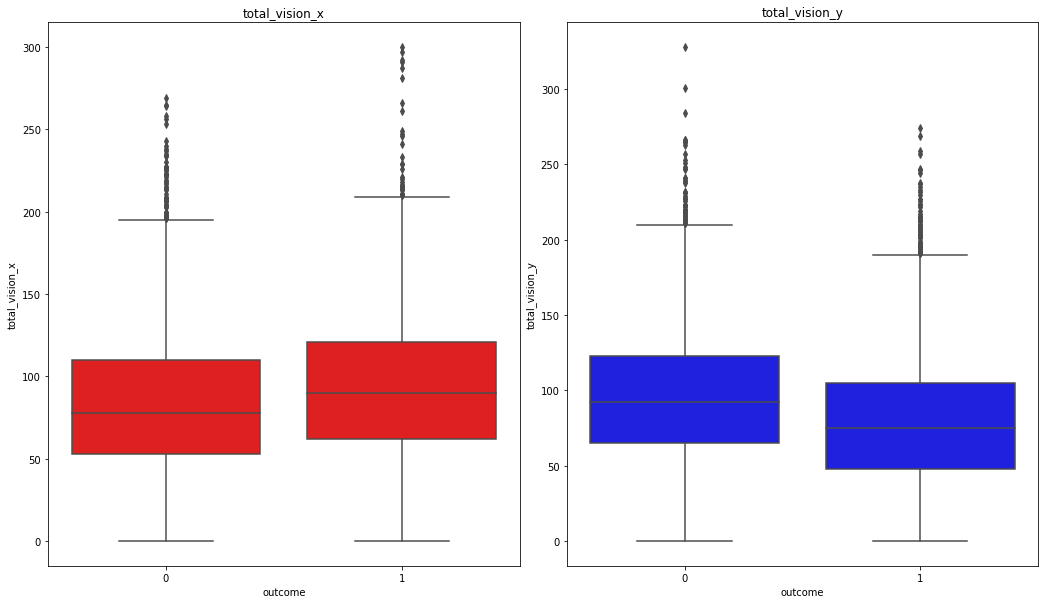

In [24]:
columns = ["total_vision_x", "total_vision_y"]

fig, ax = plt.subplots(1, len(columns), figsize=(10,10))
plt.subplots_adjust(wspace=0.1,right=1.5)
for idx, col in enumerate(columns): 
    ax[idx].set_title(col)
    sns.boxplot(data=df, x="outcome", ax=ax[idx], color=colors[idx], orient="v",y=col)
    ax[idx].title.set_text(col)
plt.show()

### outliers removal tactics : 

<ol>
    <li>For all varaibles containing 'vision', 'kills', 'assists' for team y with 1 as the outcome <b>(y lost)</b>, we will remove outliers (if not in iqr) </li>
    <li>For all unfavorable variables toward x (death for ex), we will do the same</li>
</ol>

In [25]:
def remove_outliers_iqr(ds, col, target, k=3.0):
    q1 = ds[col].quantile(0.25)
    q3 = ds[col].quantile(0.75) 
    iqr = q3 - q1
    upper_bound = (q3 + k)*iqr
    return ds[(ds[col] <= upper_bound)]

### Let's create more global feature for each team. We want to sum the total dammage dealt, taken, minions, etc

In [26]:
columns = ["totalDammageDealt", "totalDamageTaken", "turretKills", "totalMinionsKilled"]
for team in ["x", "y"]: 
    # columns to sum for a specific team
    for column in columns: 
        # grouping similar columns
        df[f"total_{column}_{team}"] = 0
        cols = [col for col in df.columns if column in col and team in col]
        for col in cols: 
            df[f"total_{column}_{team}"] += df[col]

In [27]:
df

,plateformId,gameDuration,gameMode,championId_x1,championName_x1,kills_x1,deaths_x1,assists_x1,totalDammageDealt_x1,visionScore_x1,totalDamageTaken_x1,turretKills_x1,totalMinionsKilled_x1,champLevel_x1,championId_x2,championName_x2,kills_x2,deaths_x2,assists_x2,totalDammageDealt_x2,visionScore_x2,totalDamageTaken_x2,turretKills_x2,totalMinionsKilled_x2,champLevel_x2,championId_x3,championName_x3,kills_x3,deaths_x3,assists_x3,totalDammageDealt_x3,visionScore_x3,totalDamageTaken_x3,turretKills_x3,totalMinionsKilled_x3,champLevel_x3,championId_x4,championName_x4,kills_x4,deaths_x4,assists_x4,totalDammageDealt_x4,visionScore_x4,totalDamageTaken_x4,turretKills_x4,totalMinionsKilled_x4,champLevel_x4,championId_x5,championName_x5,kills_x5,deaths_x5,assists_x5,totalDammageDealt_x5,visionScore_x5,totalDamageTaken_x5,turretKills_x5,totalMinionsKilled_x5,champLevel_x5,outcome,teamId_x,firstBlood_x,firstTower_x,firstBaron_x,firstDragon_x,towerKills_x,championId_y1,championName_y1,kills_y1,deaths_y1,assists_y1,totalDammageDealt_y1,visionScore_y1,totalDamageTaken_y1,turretKills_y1,totalMinionsKilled_y1,champLevel_y1,championId_y2,championName_y2,kills_y2,deaths_y2,assists_y2,totalDammageDealt_y2,visionScore_y2,totalDamageTaken_y2,turretKills_y2,totalMinionsKilled_y2,champLevel_y2,championId_y3,championName_y3,kills_y3,deaths_y3,assists_y3,totalDammageDealt_y3,visionScore_y3,totalDamageTaken_y3,turretKills_y3,totalMinionsKilled_y3,champLevel_y3,championId_y4,championName_y4,kills_y4,deaths_y4,assists_y4,totalDammageDealt_y4,visionScore_y4,totalDamageTaken_y4,turretKills_y4,totalMinionsKilled_y4,champLevel_y4,championId_y5,championName_y5,kills_y5,deaths_y5,assists_y5,totalDammageDealt_y5,visionScore_y5,totalDamageTaken_y5,turretKills_y5,totalMinionsKilled_y5,champLevel_y5,teamId_y,firstBlood_y,firstTower_y,firstBaron_y,firstDragon_y,towerKills,total_kills_x,total_assists_x,total_deaths_x,total_vision_x,total_kills_y,total_assists_y,total_deaths_y,total_vision_y,total_totalDammageDealt_x,total_totalDamageTaken_x,total_turretKills_x,total_totalMinionsKilled_x,total_totalDammageDealt_y,total_totalDamageTaken_y,total_turretKills_y,total_totalMinionsKilled_y
0,EUW1,2008,CLASSIC,11,Master Yi,5,10,1,183362,18,36863,2,29,14,122,Darius,12,12,3,120885,14,49607,1,150,16,238,Zed,9,8,2,122282,16,22046,2,151,16,117,Lulu,0,9,8,16743,54,20651,1,18,13,21,Miss Fortune,5,7,3,133173,22,27644,0,176,14,0,100,True,True,False,True,6,56,Nocturne,7,3,16,197003,26,35310,1,30,18,523,Aphelios,23,7,11,217791,27,26187,2,209,17,350,Yuumi,1,5,29,20352,53,10917,1,4,16,58,Renekton,5,9,9,107494,22,40800,1,122,16,99,Lux,10,8,6,170953,16,16507,3,169,17,200,False,False,True,False,8,31,17,46,124,46,71,32,144,1152890,313622,12,1048,1427186,259442,16,1068
1,EUW1,1618,CLASSIC,147,Seraphine,3,11,13,45389,49,15541,1,40,12,21,Miss Fortune,12,10,9,101020,11,19627,1,104,14,11,Master Yi,22,8,3,183412,18,29513,1,50,16,27,Singed,2,9,7,74770,6,18434,1,111,14,101,Xerath,4,5,15,64417,12,10832,1,83,14,1,100,True,False,False,True,5,104,Graves,8,10,6,125942,12,24965,0,26,13,222,Jinx,7,8,14,93279,15,20544,2,137,14,25,Morgana,11,8,19,36076,56,21017,0,33,13,150,Gnar,10,8,3,80259,19,19272,0,116,13,84,Akali,6,9,10,62490,9,25355,0,96,14,200,False,True,False,False,2,43,47,43,96,42,52,43,111,938016,187894,10,776,796092,222306,4,816
2,EUW1,1588,CLASSIC,51,Caitlyn,5,5,6,109346,10,11696,2,136,13,163,Taliyah,11,6,8,60388,40,11926,1,32,13,238,Zed,12,5,2,118817,31,15843,2,157,16,114,Fiora,13,8,10,88632,3,31053,2,132,15,5,Xin Zhao,5,3,7,106733,18,22520,3,18,13,1,100,True,True,False,True,8,41,Gangplank,7,10,7,112701,22,24866,1,148,15,203,Kindred,10,8,5,86090,5,24516,0,20,13,45,Veigar,3,10,4,58797,10,21989,0,106,13,21,Miss Fortune,1,11,8,37216,3,21576,1,53,11,268,Azir,6,8,5,73078,21,17593,0,82,12,200,False,False,False,False,2,46,33,27,102,27,29,47,61,967832,186076,20,950,735764,221080,4,818
3,EUW1,1605,CLASSIC,25,Morgana,1,8,10,20017,35,15957,1,19,11,22,Ashe,8,5,10,83824,15,10644,1,123,13,91,Talon,4,11,6,54537,12,